# Boosting
## AdaBoost (AdaBoostClassifier / AdaBoostRegressor)
#### base_estimator: 子模型
#### n_estimators: 子模型數量
#### learning_rate: 子模型權重縮減係數
#### Boosting Tree
## Gradient Boost (GradientBoostingClassifier / GradientBoostingRegressor)
#### loss: 損失函數
#### n_estimators: 子模型數量
#### learning_rate: 子模型縮減係數

## 載入Iris資料集

In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,sys
sys.path.append(os.path.abspath('./')) #for import common.utility
from utility import plot_confusion_matrix,plot_decision_regions,testcase_report

## AdaBoost (Adaptive Boosting) Algorithm

In [2]:
from sklearn.ensemble import AdaBoostClassifier


In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
#iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
#只取 target 0,2
#iris_data = iris_data[iris_data['target'].isin([1,2])]
print(iris_data.shape)

target_names: ['setosa' 'versicolor' 'virginica']
(150, 5)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
     iris_data.drop(['target'],axis=1), iris_data['target'], test_size=0.3)#random_state=0

In [5]:
AdaBoost = AdaBoostClassifier(n_estimators=100) 
AdaBoost.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
# GradientBoostingClassifier()
AdaBoost = GradientBoostingClassifier(n_estimators=100) 
AdaBoost.fit(X_train, y_train)

GradientBoostingClassifier()

In [16]:
print('training score:',AdaBoost.score(X_train,y_train))
print('test score:',AdaBoost.score(X_test,y_test))

training score: 1.0
test score: 0.9555555555555556


In [17]:
report=testcase_report(iris_data,AdaBoost,X_train,X_train,y_train)
report[0]

accuracy: 1.0
error_index : []
miss classification : []
number of errors :0/105
error data index: Int64Index([], dtype='int64')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred


In [18]:
report=testcase_report(iris_data,AdaBoost,X_test,X_test,y_test)
report[0]

accuracy: 0.9555555555555556
error_index : [ 7 43]
miss classification : [2 1]
number of errors :2/45
error data index: Int64Index([77, 119], dtype='int64')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred
77,6.7,3.0,5.0,1.7,1,2
119,6.0,2.2,5.0,1.5,2,1


In [19]:
AdaBoost.predict(X_test)

array([2, 1, 0, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0,
       2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 0, 1,
       0])

In [20]:
y_test.values

array([2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0,
       2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2,
       0])

In [21]:
importances = AdaBoost.feature_importances_
print(importances)
indices = np.argsort(importances)  #np.argsort :Returns the indices that would sort an array.
print(indices)

[0.0214451  0.10617733 0.38579721 0.48658036]
[0 1 2 3]


In [22]:
features =X_train.keys()
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


Text(0.5, 0, 'Relative Importance')

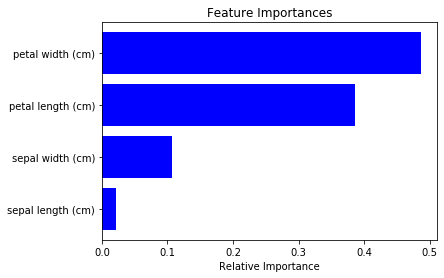

In [23]:
plt.figure(1)
print(features[indices])
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')